In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [4]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


Show Examples

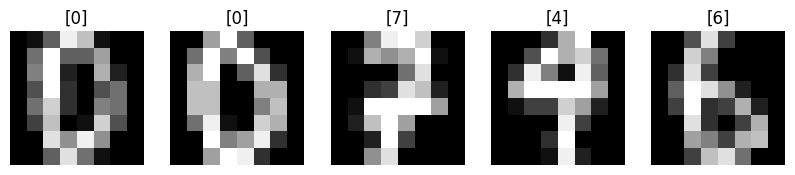

In [5]:
Xnp = X.to_numpy()
Ynp = y.to_numpy()
fig,ax = plt.subplots(
    nrows=1,
    ncols=5,
    figsize=(10,10)
)
for i in range(5):
    testImg = Xnp[i].reshape(8,8)
    ax[i].imshow(testImg,cmap=plt.cm.gray)
    ax[i].set_title(Ynp[i])
    ax[i].axis('off')


plt.show()

Train test split

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)


PCA

In [53]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

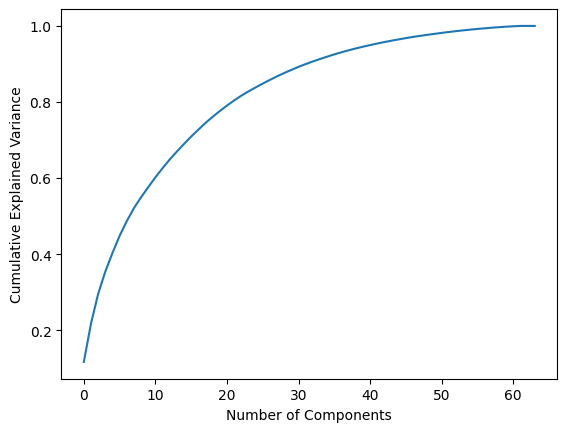

In [54]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [55]:
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to preserve {threshold*100}% variance:", num_components)

Number of components to preserve 95.0% variance: 42


In [56]:
yTrainNp = y_train.to_numpy()

<Axes: >

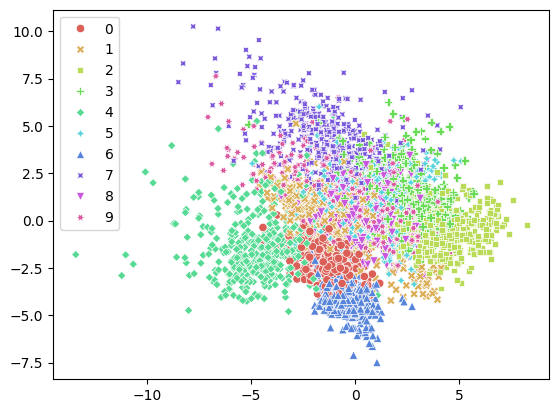

In [57]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],style = yTrainNp.reshape(-1),hue = yTrainNp.reshape(-1),palette = sns.color_palette("hls", 10))

LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train_scaled,yTrainNp.reshape(-1))


y_pred = lda.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: %.2f" % accuracy, "%")


Accuracy: 95.20 %


<Axes: >

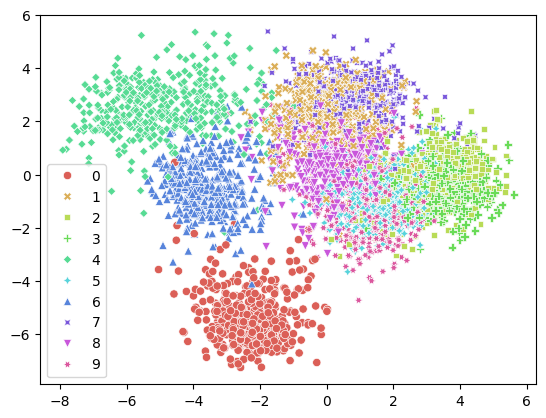

In [59]:
sns.scatterplot(x=X_lda[:,0],y=X_lda[:,1],style=yTrainNp.reshape(-1),hue=yTrainNp.reshape(-1),palette=sns.color_palette("hls", 10))

t-SNE

In [60]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train_scaled)

<Axes: >

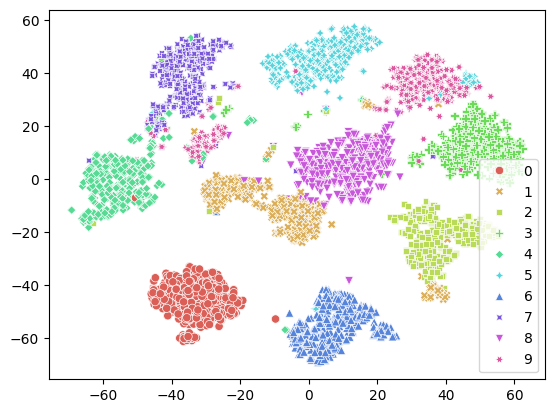

In [61]:
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],style=yTrainNp.reshape(-1),hue=yTrainNp.reshape(-1),palette=sns.color_palette("hls", 10))

Model Training

In [62]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create pipeline components

lda = LinearDiscriminantAnalysis(n_components=9)
svm = SVC()

# Create the pipeline
pipeline = Pipeline([('scaler', scaler), ('lda', lda), ('svm', svm)])

# Fit the pipeline to the training data
pipeline.fit(X_train, yTrainNp.reshape(-1))

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [63]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: %.2f" % accuracy, "%")

Accuracy: 96.89 %


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.94      0.97      0.96       102
           2       1.00      0.98      0.99       107
           3       0.97      0.96      0.97       118
           4       0.96      0.97      0.97       117
           5       0.95      0.95      0.95        97
           6       0.97      0.98      0.97       123
           7       1.00      1.00      1.00       124
           8       0.96      0.94      0.95       105
           9       0.94      0.94      0.94       123

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124



In [65]:
y_test_np = y_test.to_numpy().reshape(-1)
y_pred_np = y_pred.reshape(-1)

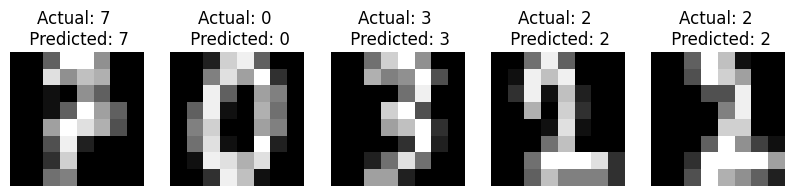

In [66]:

fig,ax = plt.subplots(
    nrows=1,
    ncols=5,
    figsize=(10,10)
)
for i in range(5):
    X_testNp = X_test.to_numpy()
    testImg = X_testNp[i].reshape(8,8)
    ax[i].imshow(testImg,cmap=plt.cm.gray)
    ax[i].set_title("Actual: " + str(y_test_np[i]) + " \n Predicted: " +str(y_pred_np[i]))
    ax[i].axis('off')

SVM + PCA

In [ ]:
# Create pipeline components
svm = SVC()
pca = PCA(n_components=42)
# Create the pipeline
pipeline2 = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svm)])

# Fit the pipeline to the training data
pipeline2.fit(X_train, yTrainNp.reshape(-1))

# Make predictions on the test data
y_pred = pipeline2.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: %.2f" % accuracy, "%")

Accuracy: 98.75 %


SVM

In [48]:
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

model = SVC()
model.fit(X_train_scaled, yTrainNp.reshape(-1))
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: %.2f" % accuracy, "%")


Accuracy: 98.84 %


# Conclusion
1. t-SNE provides the best visual understanding of class separation in your dataset, but is mainly useful for exploration and visualization, not for direct classification.
2. LDA is designed to perform dimensionality reduction for classification and typically provides a better separation of classes than PCA, making it more appropriate for tasks where class separability is important.
3. PCA is useful for general dimensionality reduction but does not necessarily show the best separation between classes. It’s useful when you want to reduce dimensionality without worrying about class labels.